In [47]:
'''
TOPIC:
Analyse air quality dynamics in your locality with machine learning and remote sensing during lockdown period with use of IMD and satellite
data
GROUP: 4 Members
Group- Suryapratim Ray(Team Leader), Aditya Bhattacharya, Rajat Biswas, Preetam Ghosh

The entire project uses real time data provided "Air Quality Historical Data Platform"
The project uses a realtime information fetching REST api key which helps in providing area wise data, which is the Kolkata US
Consulate India in our case.

---Work done
Gather real time data and filter it
Analyse the data graphically using charts
Get a pollution analysis of the data
Learn according to the pollution basics
Analyse the data and plot charts for days of lockdown
Plot charts for days before lockdown
Mark the improvement in the quality of air

---Work left
Compare the two plots in the same graph axis
Use ML to predict Air quality plot for the next one month at least


Go through the code and understand everything (only for members) Also please install request library if not done previously

'''
import requests

In [43]:
city = 'kolkata'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '37f96394ffe8b6cca1110af3d8270604c711c688'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 21,
 'idx': 7021,
 'attributions': [{'url': 'http://worldweather.wmo.int',
   'name': 'World Meteorological Organization - surface synoptic observations (WMO-SYNOP)'},
  {'url': 'https://in.usembassy.gov/embassy-consulates/new-delhi/air-quality-data/',
   'name': "U.S. Embassy and Consulates' Air Quality Monitor in India",
   'logo': 'US-StateDepartment.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [22.56263, 88.36304],
  'name': 'Kolkata US Consulate, India (कोलकाता अमेरिकी वाणिज्य दूतावास)',
  'url': 'https://aqicn.org/city/india/kolkata/us-consulate'},
 'dominentpol': 'pm25',
 'iaqi': {'dew': {'v': 20},
  'h': {'v': 94},
  'p': {'v': 1008},
  'pm25': {'v': 21},
  't': {'v': 21},
  'w': {'v': 1.5},
  'wg': {'v': 11.3}},
 'time': {'s': '2020-05-08 01:00:00', 'tz': '+05:30', 'v': 1588899600},
 'debug': {'sync': '2020-05-08T05:08:17+09:00'}}

In [44]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])

dew : 20
h : 94
pm25 : 21
t : 21
w : 1.5
wg : 11.3


In [45]:
dew = iaqi.get('dew','Nil')
h = iaqi.get('h','Nil')
pm25 = iaqi.get('pm25','Nil')
t = iaqi.get('t','Nil')
w = iaqi.get('w','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('hydrogen levels:',h)
print('particulate PM25 :',pm25)
print('t :',t)
print('water particles :',w)



kolkata AQI : 21 

Individual Air quality
Dew : {'v': 20}
hydrogen levels: {'v': 94}
particulate PM25 : {'v': 21}
t : {'v': 21}
water particles : {'v': 1.5}


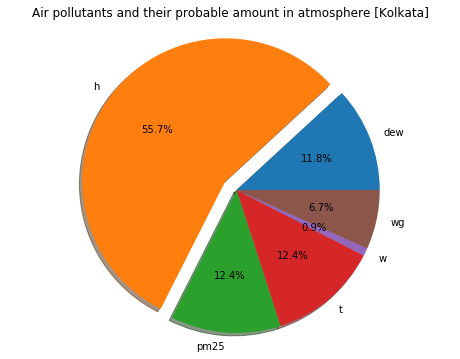

In [46]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]



explode = [0 for i in pollutants]
mx = values.index(max(values))  
explode[mx] = 0.1

plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [Kolkata]')

plt.axis('equal')
plt.show()

In [8]:
import pandas as pd


csv_path = 'kolkata-us consulate-air-quality.csv'

df = pd.read_csv(csv_path)
df = df.head(50)
print(df)

         date   pm25
0    2020/5/1     43
1    2020/5/2     74
2    2020/5/3     76
3    2020/5/4     77
4    2020/5/5     64
5    2020/5/6     49
6    2020/5/7     56
7    2020/4/1    140
8    2020/4/2    115
9    2020/4/3    128
10   2020/4/4    143
11   2020/4/5    136
12   2020/4/6    117
13   2020/4/7    125
14   2020/4/8     89
15   2020/4/9     78
16  2020/4/10     69
17  2020/4/11     78
18  2020/4/12     83
19  2020/4/13     92
20  2020/4/14     92
21  2020/4/15     92
22  2020/4/16    101
23  2020/4/17     76
24  2020/4/18     67
25  2020/4/19     57
26  2020/4/20     62
27  2020/4/21     57
28  2020/4/22     63
29  2020/4/23     56
30  2020/4/24     46
31  2020/4/25     56
32  2020/4/26     63
33  2020/4/27     37
34  2020/4/28     34
35  2020/4/29     70
36  2020/4/30     59
37   2020/3/1    191
38   2020/3/2    191
39   2020/3/3    158
40   2020/3/4    144
41   2020/3/5    115
42   2020/3/6    116
43   2020/3/7    114
44   2020/3/8    117
45   2020/3/9    148
46  2020/3/10

In [9]:
import pandas as pd


csv_path = 'victoria,-kolkata-air-quality.csv'

df = pd.read_csv(csv_path)
df = df.head(50)
print(df)

         date  pm25  pm10   o3  no2  so2   co
0    2020/5/1    41    29   17    6    2    5
1    2020/5/2    64    28   20    5    2    5
2    2020/5/3    65    30   14    5    3    5
3    2020/5/4    72    31   17    4    3    5
4    2020/5/5    65    29   23    7    4    4
5    2020/5/6    44    33   22    5    3    4
6    2020/5/7    62                          
7    2020/4/1   118    50   55    5    4   15
8    2020/4/2   101    55   66    7    4   15
9    2020/4/3   110    59   67    8    6    8
10   2020/4/4   130    50   40    5    5    5
11   2020/4/5   112    51   36    7    5    4
12   2020/4/6    97    55   40    4    6    4
13   2020/4/7   108    27   40    5    4    3
14   2020/4/8    77    28   50    6    6    4
15   2020/4/9    72    21   27    3    3    5
16  2020/4/10    66    20   23    2    4    4
17  2020/4/11    65    36   17    3    3    4
18  2020/4/12    77    31   22    2    4    5
19  2020/4/13    81    45   17    2    3    5
20  2020/4/14    85    46   18    

In [10]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [24]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2020-04-17']
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10,o3,no2,so2,co
24,2020-04-18,68,29,20,3,4,4
25,2020-04-19,51,26,20,3,4,5
26,2020-04-20,57,26,16,7,3,3
27,2020-04-21,45,23,18,5,5,4
28,2020-04-22,62,27,14,4,3,5
29,2020-04-23,57,29,17,4,4,4
30,2020-04-24,46,29,19,4,4,4
31,2020-04-25,55,30,20,4,3,4
32,2020-04-26,59,29,12,4,3,4
33,2020-04-27,46,31,14,5,2,5


In [26]:
df21.replace(' ', '0', inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
24,2020-04-18,68,29,20,3,4,4
25,2020-04-19,51,26,20,3,4,5
26,2020-04-20,57,26,16,7,3,3
27,2020-04-21,45,23,18,5,5,4
28,2020-04-22,62,27,14,4,3,5
29,2020-04-23,57,29,17,4,4,4
30,2020-04-24,46,29,19,4,4,4
31,2020-04-25,55,30,20,4,3,4
32,2020-04-26,59,29,12,4,3,4
33,2020-04-27,46,31,14,5,2,5


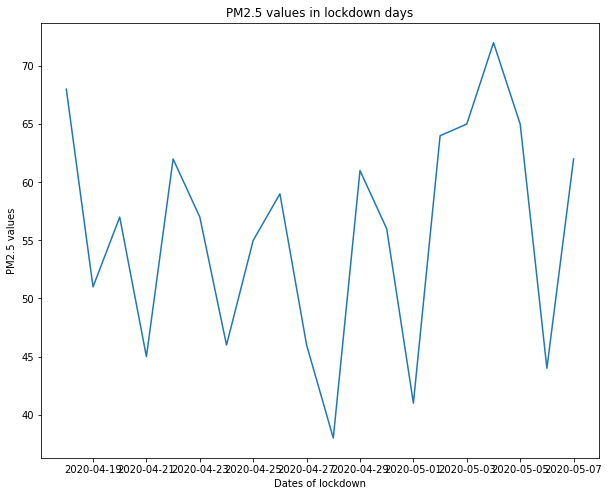

In [39]:
import matplotlib.pyplot as plt

dates1 = df21['date']
pm_25 = df21['pm25']
pm_25 = [int(i) for i in pm_25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates1,pm_25)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

In [30]:
df['date'] = pd.to_datetime(df.date)

past21 = df.loc[df['date'] < '2020-04-17']
past21 = past21.sort_values(by = 'date')
past21


,date,pm25,pm10,o3,no2,so2,co
37,2020-03-01,170,122,62,33,9,18
38,2020-03-02,167,78,14,31,4,20
39,2020-03-03,151,61,39,19,8,12
40,2020-03-04,123,54,36,24,4,16
41,2020-03-05,89,56,38,20,7,12
42,2020-03-06,94,48,25,18,4,15
43,2020-03-07,91,56,43,22,4,14
44,2020-03-08,100,78,70,25,4,10
45,2020-03-09,131,85,86,29,9,14
46,2020-03-10,139,74,72,23,6,15


In [ ]:
#HISTORICAL DATA ANALYSIS

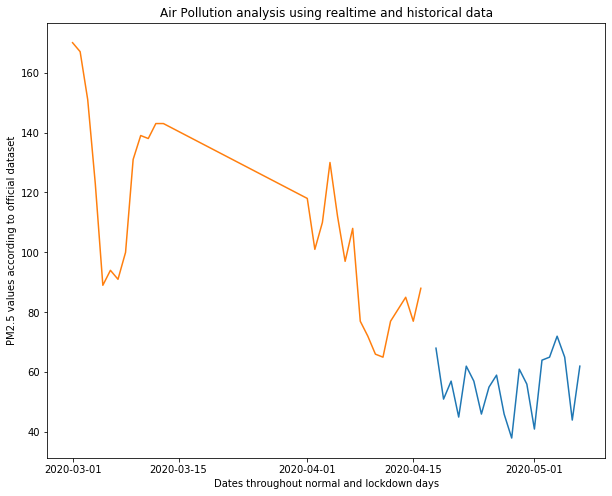

In [42]:
import matplotlib.pyplot as plt

dates2 = past21['date']
pm25 = past21['pm25']
pm25 = [int(i) for i in pm25]

dates1 = df21['date']
pm_25 = df21['pm25']
pm_25 = [int(i) for i in pm_25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates1,pm_25)
plt.plot(dates2,pm25)
plt.title('Air Pollution analysis using realtime and historical data')
plt.xlabel('Dates throughout normal and lockdown days')
plt.ylabel('PM2.5 values according to official dataset')
plt.show()